# Exploratory Data Analysis (EDA)

## Introduction
The purpose of this notebook is to perform an EDA on each provided data set to assist in determining what they contain and which would be most useful for our analysis.

## 1. Data Loading
I'm going to start with the csv and tsv files and will take a look at the sqlite file separately.

In [1]:
import pandas as pd

# Load the datasets
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Display loaded data head
bom_movie_gross.head(), rt_movie_info.head(), rt_reviews.head(), tmdb_movies.head(), tn_movie_budgets.head()


(                                         title studio  domestic_gross  \
 0                                  Toy Story 3     BV     415000000.0   
 1                   Alice in Wonderland (2010)     BV     334200000.0   
 2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
 3                                    Inception     WB     292600000.0   
 4                          Shrek Forever After   P/DW     238700000.0   
 
   foreign_gross  year  
 0     652000000  2010  
 1     691300000  2010  
 2     664300000  2010  
 3     535700000  2010  
 4     513900000  2010  ,
    id                                           synopsis rating  \
 0   1  This gritty, fast-paced, and innovative police...      R   
 1   3  New York City, not-too-distant-future: Eric Pa...      R   
 2   5  Illeana Douglas delivers a superb performance ...      R   
 3   6  Michael Douglas runs afoul of a treacherous su...      R   
 4   7                                                NaN     N

## 2. Basic Statistics and Structure
Here we inspect the structure, data types, and basic statistics for each dataset.

In [2]:
# Inspecting basic info and statistics for each dataset

# BOM Movie Gross
print("BOM Movie Gross Data Info:")
bom_movie_gross.info()
print("BOM Movie Gross Summary Statistics:")
print(bom_movie_gross.describe(include='all'))

# RT Movie Info
print("RT Movie Info Data Info:")
rt_movie_info.info()
print("RT Movie Info Summary Statistics:")
print(rt_movie_info.describe(include='all'))

# RT Reviews
print("RT Reviews Data Info:")
rt_reviews.info()
print("RT Reviews Summary Statistics:")
print(rt_reviews.describe(include='all'))

# TMDB Movies
print("TMDB Movies Data Info:")
tmdb_movies.info()
print("TMDB Movies Summary Statistics:")
print(tmdb_movies.describe(include='all'))

# TN Movie Budgets
print("TN Movie Budgets Data Info:")
tn_movie_budgets.info()
print("TN Movie Budgets Summary Statistics:")
print(tn_movie_budgets.describe(include='all'))

BOM Movie Gross Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
BOM Movie Gross Summary Statistics:
            title studio  domestic_gross foreign_gross         year
count        3387   3382    3.359000e+03          2037  3387.000000
unique       3386    257             NaN          1204          NaN
top     Bluebeard    IFC             NaN       1200000          NaN
freq            2    166             NaN            23          NaN
mean          NaN    NaN    2.874585e+07           NaN  2013.958075
std           NaN    NaN    6.698250e+07    

### Synopsis of the tsv and csv Data Sources

#### BOM Movie Gross:
- **Data Overview**:
  - **Total Entries**: 3,387
  - **Key Columns**: `title` (object), `studio` (object), `domestic_gross` (float64), `foreign_gross` (object), `year` (int64)
- **Data Types**:
  - `domestic_gross` is correctly typed as `float64`.
  - **Issues**: `foreign_gross` is stored as an object, likely due to the presence of non-numeric characters (e.g., commas, dollar signs). This column will need to be converted to `float64` after cleaning.
- **Re-casting Needed**: Convert `foreign_gross` from `object` to `float64` after data cleaning.

#### RT Movie Info:
- **Data Overview**:
  - **Total Entries**: 1,560
  - **Key Columns**: `id` (int64), `synopsis` (object), `rating` (object), `genre` (object), `director` (object), `box_office` (object)
- **Data Types**:
  - Most columns are correctly typed as `object`, given their textual nature.
  - **Issues**: `box_office` is stored as an `object` but should be numeric for analysis. It likely contains non-numeric characters that need cleaning.
  - `theater_date` and `dvd_date` are stored as `object` and may need conversion to `datetime`.
- **Re-casting Needed**:
  - Convert `box_office` from `object` to `float64` after cleaning.
  - Convert `theater_date` and `dvd_date` from `object` to `datetime`.

#### RT Reviews:
- **Data Overview**:
  - **Total Entries**: 54,432
  - **Key Columns**: `id` (int64), `review` (object), `rating` (object), `fresh` (object), `date` (object)
- **Data Types**:
  - **Issues**: `rating` is stored as `object`, but it could be converted to a numeric type if it represents numerical scores (e.g., 3/5).
  - `date` is stored as `object` and should be converted to `datetime` for time-based analysis.
- **Re-casting Needed**:
  - Convert `rating` to a numeric type if possible.
  - Convert `date` from `object` to `datetime`.

#### TMDB Movies:
- **Data Overview**:
  - **Total Entries**: 26,517
  - **Key Columns**: `id` (int64), `original_language` (object), `popularity` (float64), `release_date` (object), `vote_average` (float64)
- **Data Types**:
  - `popularity` and `vote_average` are correctly typed as `float64`.
  - **Issues**: `release_date` is stored as `object` and should be converted to `datetime`.
- **Re-casting Needed**:
  - Convert `release_date` from `object` to `datetime`.

#### TN Movie Budgets:
- **Data Overview**:
  - **Total Entries**: 5,782
  - **Key Columns**: `id` (int64), `release_date` (object), `production_budget` (object), `domestic_gross` (object), `worldwide_gross` (object)
- **Data Types**:
  - **Issues**: `production_budget`, `domestic_gross`, and `worldwide_gross` are stored as `object` and likely contain non-numeric characters (e.g., dollar signs, commas). These should be converted to `float64` after cleaning.
  - `release_date` is stored as `object` and should be converted to `datetime`.
- **Re-casting Needed**:
  - Convert `production_budget`, `domestic_gross`, and `worldwide_gross` from `object` to `float64` after cleaning.
  - Convert `release_date` from `object` to `datetime`.


## 3. Exploring the IMDb Database
Next, we'll connect to the IMDb SQLite database, list the tables, and explore the contents of each table.

In [3]:
import sqlite3
from zipfile import ZipFile

# Unzip the sqlite db file
with ZipFile("zippedData/im.db.zip", 'r') as zObject:
    zObject.extractall("zippedData/")

# Connect to the IMDb SQLite database
imdb_db_actual_path = 'zippedData/im.db'
conn = sqlite3.connect(imdb_db_actual_path)

# Get the list of tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(tables_query, conn)

# For each table, display the first few rows and basic information
table_infos = {}
for table in tables['name']:
    query = f"SELECT * FROM {table} LIMIT 5;"
    table_info = pd.read_sql(query, conn)
    table_infos[table] = table_info

# Close the connection
conn.close()

tables, table_infos

(            name
 0   movie_basics
 1      directors
 2      known_for
 3     movie_akas
 4  movie_ratings
 5        persons
 6     principals
 7        writers,
 {'movie_basics':     movie_id                    primary_title              original_title  \
  0  tt0063540                        Sunghursh                   Sunghursh   
  1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
  2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
  3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
  4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
  
     start_year  runtime_minutes                genres  
  0        2013            175.0    Action,Crime,Drama  
  1        2019            114.0       Biography,Drama  
  2        2018            122.0                 Drama  
  3        2018              NaN          Comedy,Drama  
  4        2017             80.0  Comedy,Drama,Fantasy  ,
 

### Synopsis of IMDb Database Contents

The IMDB SQLite database contains several tables that provide detailed information related to movies, directors, writers, ratings, and more. Here’s a brief overview of the key tables:

1. **`movie_basics`**:
   - **Contents**: Basic information about movies including `movie_id`, `primary_title`, `original_title`, `start_year`, `runtime_minutes`, and `genres`.
   - **Example**: Contains movies like "Sunghursh" and "The Other Side of the Wind", with details on runtime and genres.

2. **`directors`**:
   - **Contents**: Links movies to their directors using `movie_id` and `person_id`.
   - **Example**: Maps movie IDs to director IDs, showing who directed which movie.

3. **`known_for`**:
   - **Contents**: Links persons (directors, actors, etc.) to the movies they are known for, using `person_id` and `movie_id`.
   - **Example**: Indicates which movies a person is prominently associated with.

4. **`movie_akas`**:
   - **Contents**: Contains alternate titles for movies in different regions and languages, with fields like `title`, `region`, `language`, and `is_original_title`.
   - **Example**: Shows alternate titles for "Jurassic World" across different regions.

5. **`movie_ratings`**:
   - **Contents**: Includes movie ratings, such as `averagerating` and `numvotes`, identified by `movie_id`.
   - **Example**: Contains ratings for movies, with an example showing a movie with a rating of 8.9 from 559 votes.

6. **`persons`**:
   - **Contents**: Information about persons involved in movie production, including `person_id`, `primary_name`, `birth_year`, `death_year`, and `primary_profession`.
   - **Example**: Lists individuals like "Mary Ellen Bauder" and their roles (e.g., producer, composer).

7. **`principals`**:
   - **Contents**: Lists key persons involved in movies, categorized by their roles (e.g., actor, director, producer), along with the characters they portrayed if applicable.
   - **Example**: Shows the main actors, directors, and producers for specific movies.

8. **`writers`**:
   - **Contents**: Links movies to their writers using `movie_id` and `person_id`.
   - **Example**: Identifies the writers responsible for the screenplay of specific movies.

# 4. Data Visualization
I'll do some basic visualizations just to get a better grasp on the data

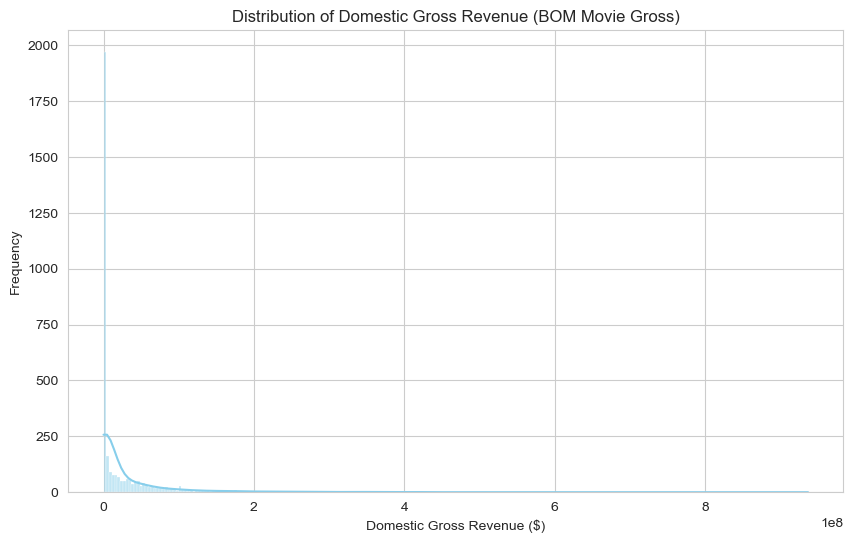

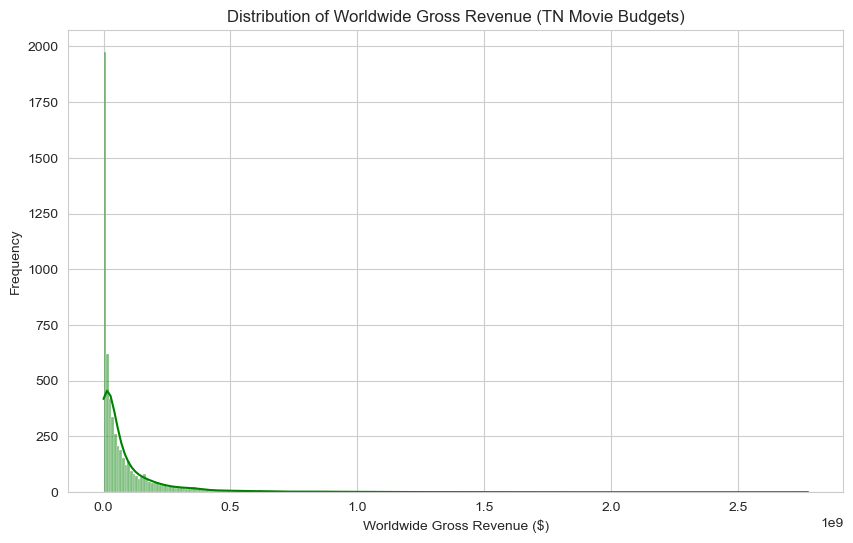

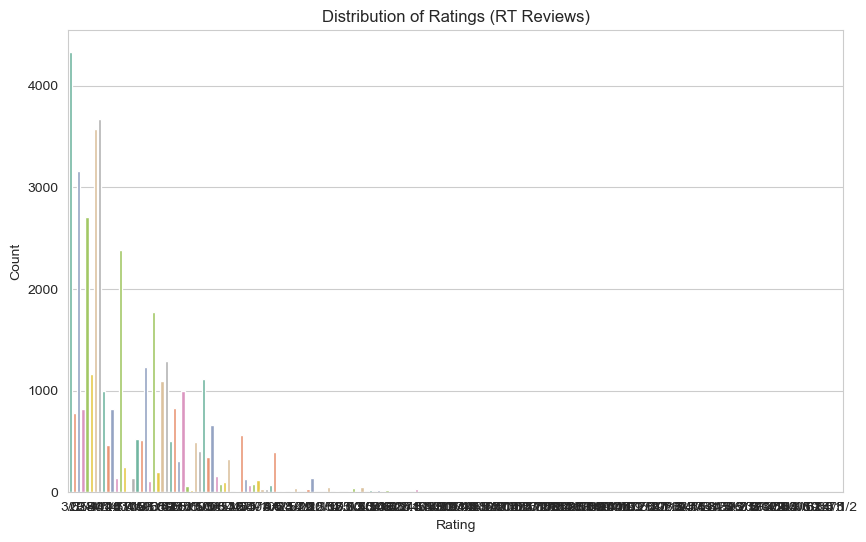

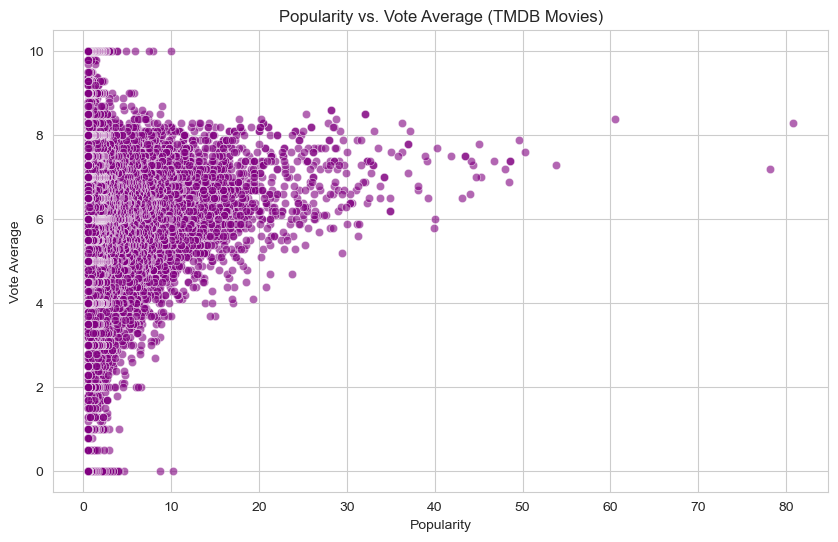

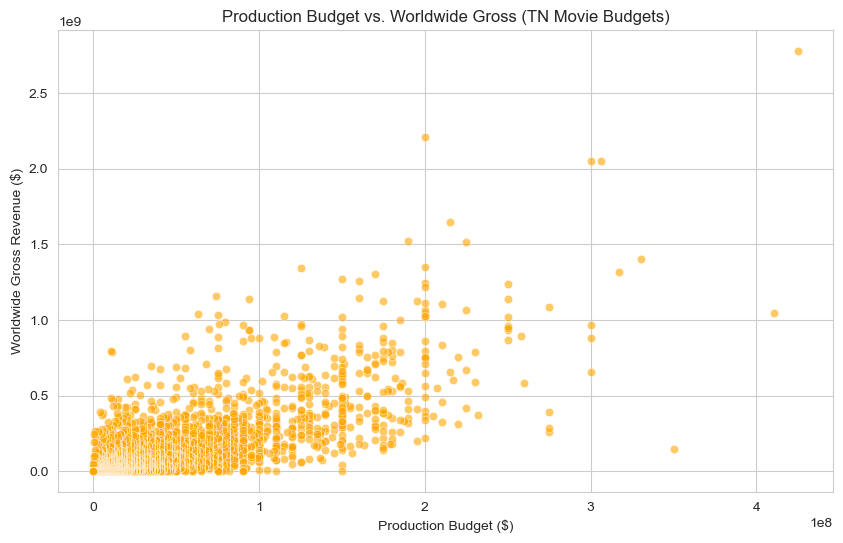

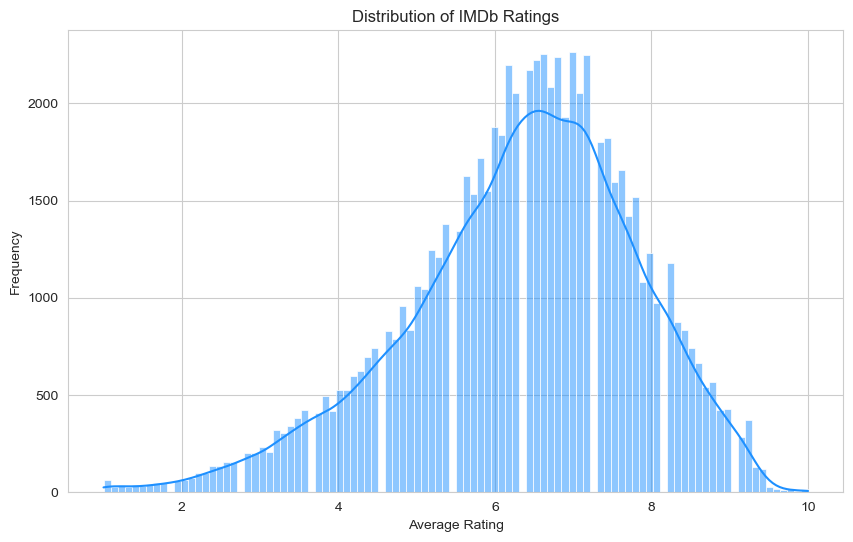

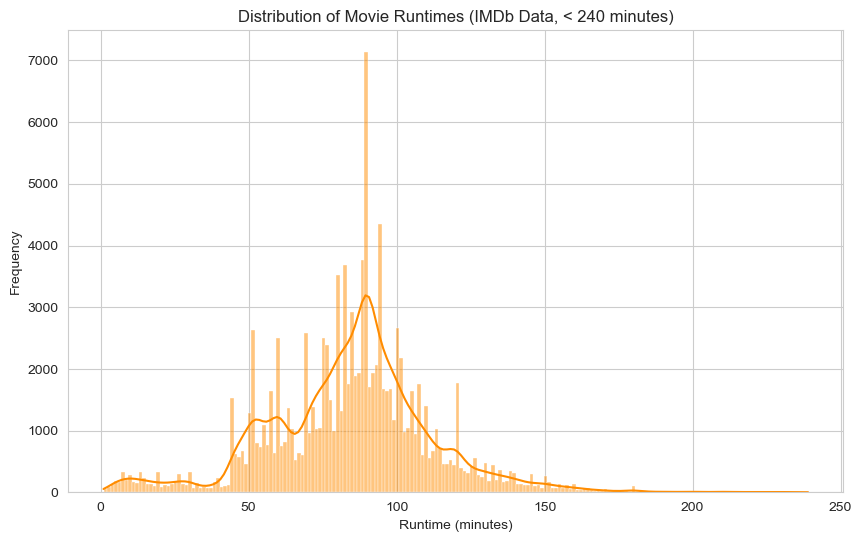

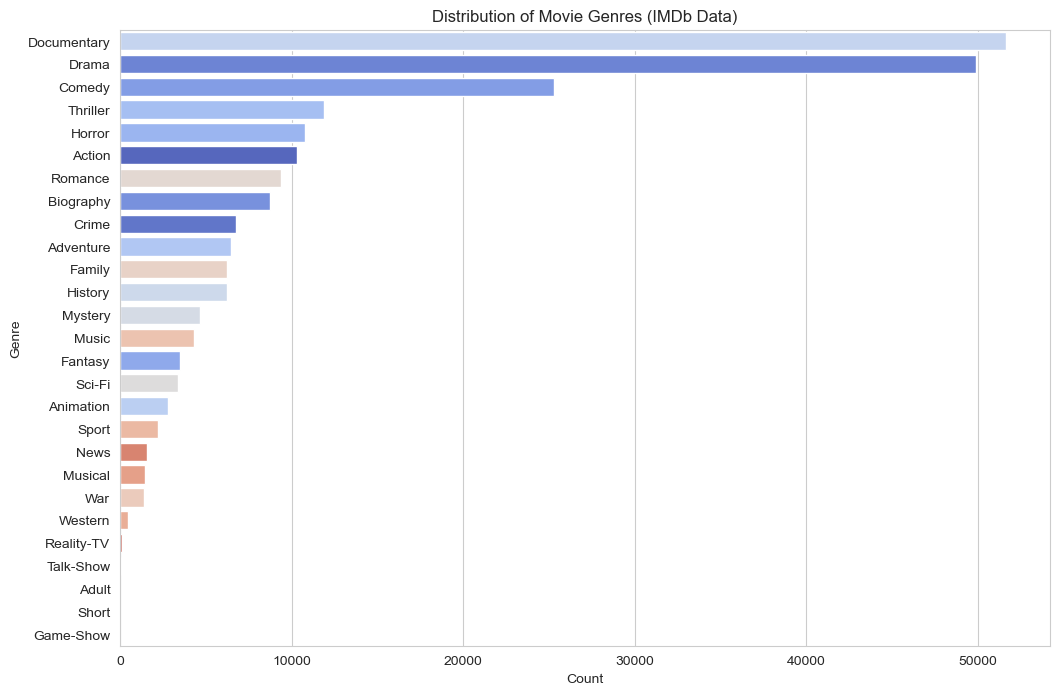

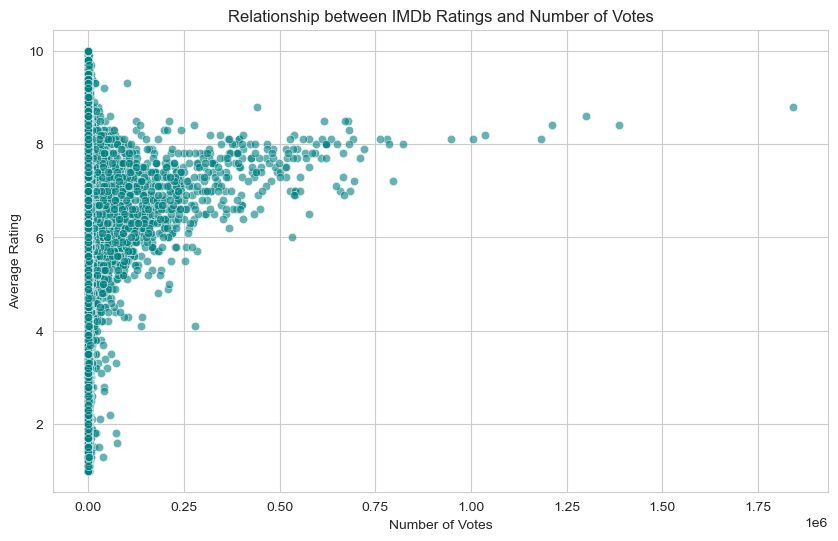

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of Domestic Gross Revenue in BOM Movie Gross
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(bom_movie_gross['domestic_gross'].dropna(), kde=True, color='skyblue', ax=ax)
ax.set_title('Distribution of Domestic Gross Revenue (BOM Movie Gross)')
ax.set_xlabel('Domestic Gross Revenue ($)')
ax.set_ylabel('Frequency')
plt.show()

# Visualization 2: Distribution of Worldwide Gross Revenue in TN Movie Budgets
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(tn_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float), kde=True, color='green', ax=ax)
ax.set_title('Distribution of Worldwide Gross Revenue (TN Movie Budgets)')
ax.set_xlabel('Worldwide Gross Revenue ($)')
ax.set_ylabel('Frequency')
plt.show()

# Visualization 3: Distribution of Ratings in RT Reviews
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='rating', data=rt_reviews, hue='rating', palette='Set2', dodge=False, legend=False, ax=ax)
ax.set_title('Distribution of Ratings (RT Reviews)')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

# Visualization 4: Popularity vs. Vote Average in TMDB Movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_average', data=tmdb_movies, alpha=0.6, color='purple', ax=ax)
ax.set_title('Popularity vs. Vote Average (TMDB Movies)')
ax.set_xlabel('Popularity')
ax.set_ylabel('Vote Average')
plt.show()

# Visualization 5: Production Budget vs. Worldwide Gross in TN Movie Budgets
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=tn_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float),
                y=tn_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float),
                alpha=0.6, color='orange', ax=ax)
ax.set_title('Production Budget vs. Worldwide Gross (TN Movie Budgets)')
ax.set_xlabel('Production Budget ($)')
ax.set_ylabel('Worldwide Gross Revenue ($)')
plt.show()

# Connect to the IMDb SQLite database
conn = sqlite3.connect('zippedData/im.db')

# Load the necessary tables into dataframes
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)

# Close the connection
conn.close()

# Visualization 6: Distribution of IMDb Ratings
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(movie_ratings['averagerating'], kde=True, color='dodgerblue', ax=ax)
ax.set_title('Distribution of IMDb Ratings')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Frequency')
plt.show()

# Visualization 7: Distribution of Movie Runtimes in IMDb Data (Filtered)
# Filter movie_basics for movies with runtime less than 240 minutes
filtered_movie_basics = movie_basics[movie_basics['runtime_minutes'] < 240]
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(filtered_movie_basics['runtime_minutes'].dropna(), kde=True, color='darkorange', ax=ax)
ax.set_title('Distribution of Movie Runtimes (IMDb Data, < 240 minutes)')
ax.set_xlabel('Runtime (minutes)')
ax.set_ylabel('Frequency')
plt.show()

# Visualization 8: Distribution of Movie Genres in IMDb Data
movie_basics['genre_list'] = movie_basics['genres'].str.split(',')
all_genres = movie_basics['genre_list'].explode().dropna()

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y=all_genres, order=all_genres.value_counts().index, palette='coolwarm', hue=all_genres, dodge=False, legend=False, ax=ax)
ax.set_title('Distribution of Movie Genres (IMDb Data)')
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
plt.show()

# Visualization 9: Relationship between IMDb Ratings and Number of Votes
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=movie_ratings['numvotes'], y=movie_ratings['averagerating'], alpha=0.6, color='teal', ax=ax)
ax.set_title('Relationship between IMDb Ratings and Number of Votes')
ax.set_xlabel('Number of Votes')
ax.set_ylabel('Average Rating')
plt.show()